In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# parameters
a = .02
b = .2
c = -50
d = 2

v = -65
u = b*v

In [3]:
# initialize variables

simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)
# foor loop over sim time
for t in range(simulation_time):
  # define input strength
  I = -2 if (t>200) &(t<400) else 7
  
  # check if there is an action potential
  if v >= 30:
    v = c
    u = u+d

  # update membrane variables

  v +=  .04*v**2 + 5*v + 140 - u + I
  u += a*(b*v-u)

  # collect variables
  memvolt[t] = v
  Iall[t] = I

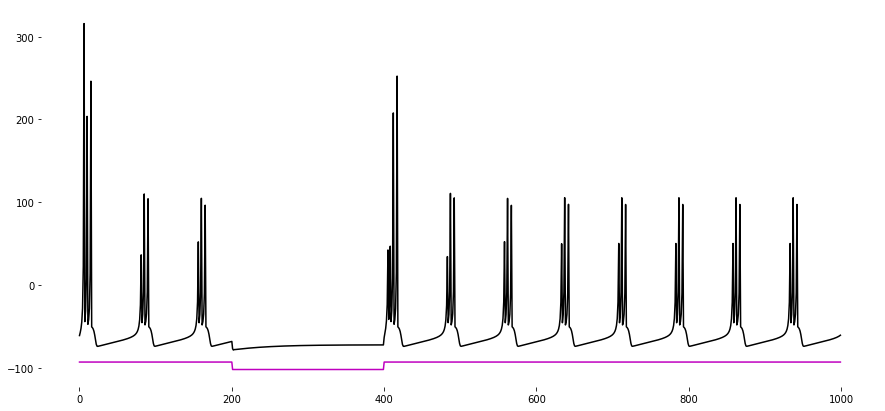

In [5]:
# plotting
fig,ax = plt.subplots(1,figsize=(15,7))
plt.plot(memvolt,'k')
plt.plot(Iall-100,'m')
plt.box(False)

In [45]:
# Excitatory neurons                 Inhibitory neurons
Ne = 800;                            Ni = 200
re = np.random.rand(Ne);             ri = np.random.rand(Ni)

#               excitatory           inhibitory
a = np.hstack((.02*np.ones(Ne),     .02+.08*ri))
b = np.hstack((.2*np.ones(Ne),      .25-.05*ri))
c = np.hstack((-65+15*re**2,        -65*np.ones(Ni)))
d = np.hstack((8-6*re**2,            2*np.ones(Ni)))

# initial values of v and u
v = -65*np.ones(Ne+Ni)
u = b*v

# matrix of all-to-all synaptic weights
S = np.hstack((.5*np.random.rand(Ne+Ni,Ne), -np.random.rand(Ne+Ni,Ni) ))

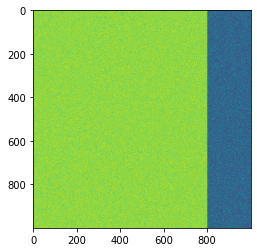

In [46]:
plt.imshow(S)

In [47]:
# initializations
simulation_time = 5000
firings = np.array([[],[]])

# loop through simulation time
for t in range(simulation_time):

  # define random exogenous input strength (different for E and I cells)
  I = np.hstack((5*np.random.randn(Ne),2*np.random.randn(Ni)))
  # I = np.hstack((5*np.ones(Ne),2*np.ones(Ni)))
  
  # check if action potential and update
  fired   = np.where(v>=30)[0]
  tmp     = np.stack((np.tile(t,len(fired)),fired))
  firings = np.concatenate((firings,tmp),axis=1)

  # update membrane variables for cells that fired
  v[fired] = c[fired]
  u[fired] = u[fired] + d[fired]

  # update membrane variables for down-stream cells
  I += np.sum(S[:,fired],axis=1)
  
  # update membrane voltage
  v += .04*v**2 + 5*v + 140 - u + I
  u += a*(b*v-u)


In [48]:

fired

array([164, 408, 713, 932])

(0.0, 100.0)

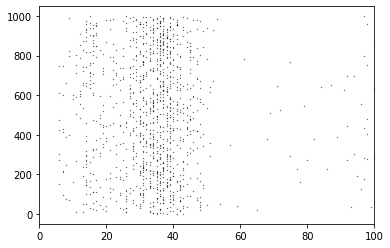

In [52]:
plt.plot(firings[0,:],firings[1,:],'k.',markersize = .5)
plt.xlim([0,100])

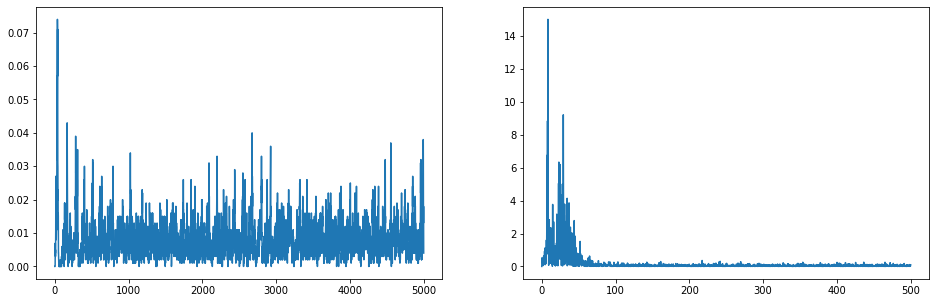

In [57]:
popact = np.zeros(simulation_time)
for t in range(simulation_time):
  popact[t] = np.sum(firings[0,:]==t)/(Ne+Ni)

#spectral analysis
popactX = np.abs(np.fft.fft(popact-np.mean(popact)))**2
hz = np.linspace(0,1000/2,int(simulation_time/2+1))

fig,ax = plt.subplots(1,2,figsize = (16,5))
ax[0].plot(popact)
ax[1].plot(hz,popactX[:len(hz)])
